# Markowitz Portfolio Network MPN

### Preprocessing Data

In [1]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np

In [2]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')
print(tickers[1])

                     Company Exchange Symbol                        Industry  \
0                         3M     NYSE    MMM                    Conglomerate   
1           American Express     NYSE    AXP              Financial services   
2                      Amgen   NASDAQ   AMGN               Biopharmaceutical   
3                      Apple   NASDAQ   AAPL          Information technology   
4                     Boeing     NYSE     BA           Aerospace and defense   
5                Caterpillar     NYSE    CAT         Construction and Mining   
6                    Chevron     NYSE    CVX              Petroleum industry   
7              Cisco Systems   NASDAQ   CSCO          Information technology   
8                  Coca-Cola     NYSE     KO                      Soft Drink   
9                     Disney     NYSE    DIS  Broadcasting and entertainment   
10                       Dow     NYSE    DOW               Chemical industry   
11             Goldman Sachs     NYSE   

In [3]:
# tickers = tickers[0]
# symbols = tickers.sort_values('Date first added')['Symbol'][:50]
symbols = tickers[1]['Symbol']

In [4]:
symbols = symbols.reset_index(drop=True)

In [5]:
return_d = pdr.yahoo.daily.YahooDailyReader(symbols, start='JAN-01-2000')
df = return_d.read()
return_d.close()

In [6]:
df = df['Adj Close']
df

Symbols,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DIS,...,MSFT,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,27.959967,35.842426,46.445198,0.787035,26.747133,13.109968,19.325575,39.000427,15.966598,22.631668,...,36.853397,4.908099,30.536062,NaN,19.190569,5.509177,20.405436,NaN,20.111467,46.470005
2000-01-03,26.960121,33.902096,48.668388,0.856887,25.940287,13.545226,18.656300,39.341724,15.452649,23.115250,...,36.794201,4.765745,29.874134,NaN,18.798925,5.573991,19.866814,NaN,19.638767,44.915398
2000-01-04,25.888849,32.622013,44.946983,0.784643,25.899935,13.371124,18.656300,37.134598,15.469785,24.469288,...,35.551311,4.505794,29.299292,NaN,18.549698,5.502697,19.224617,NaN,18.908218,43.234749
2000-01-05,26.638742,31.793440,46.493546,0.796124,27.513632,13.684512,18.990934,37.020817,15.606836,25.484812,...,35.926147,4.765745,28.741875,NaN,18.407284,5.489735,19.866814,NaN,19.123100,42.352409
2000-01-06,28.781265,32.441170,47.266827,0.727229,27.796041,14.380923,19.799650,36.406464,15.623962,24.469288,...,34.722683,4.740987,30.065737,NaN,18.763317,5.690658,19.765900,NaN,18.564438,42.814575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-11,178.979996,175.380005,232.380005,175.080002,216.020004,219.949997,127.970001,62.369999,60.450001,157.889999,...,314.980011,150.300003,158.660004,234.839996,163.160004,469.000000,53.590000,214.380005,54.330002,144.199997
2022-01-12,179.419998,174.470001,231.759995,175.529999,217.449997,222.399994,127.330002,62.119999,60.540001,157.800003,...,318.269989,152.210007,159.009995,237.830002,162.970001,473.720001,53.450001,215.710007,53.910000,143.440002
2022-01-13,181.020004,173.289993,230.850006,172.190002,223.899994,227.000000,126.800003,61.500000,60.900002,155.440002,...,304.799988,149.589996,158.289993,228.630005,163.050003,467.429993,53.520000,215.000000,54.189999,145.470001


In [7]:
df = df.dropna(axis=1)
df = df.pct_change()
df = df.dropna()

In [8]:
column = df.columns
column

Index(['MMM', 'AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
       'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT',
       'NKE', 'PG', 'TRV', 'UNH', 'VZ', 'WBA', 'WMT'],
      dtype='object', name='Symbols')

In [9]:
df_train = df.iloc[:4000]
df_test = df.iloc[4000:]

In [10]:
xc_train = np.zeros((4000-60-20, 60, 27), np.float32)
xf_train = np.zeros((4000-60-20, 20, 27), np.float32)
xc_test = np.zeros((len(df_test)-60-20, 60, 27), np.float32)
xf_test = np.zeros((len(df_test)-60-20, 20, 27), np.float32)

In [11]:
for i in range(60, 4000-20):
    xc_train[i-60] = df_train.iloc[i-60:i]
    xf_train[i-60] = df_train.iloc[i+1:i+21]

In [12]:
for i in range(60, len(df_test)-20):
    xc_test[i-60] = df_test.iloc[i-60:i]
    xf_test[i-60] = df_test.iloc[i+1:i+21]

In [13]:
print(xc_train.shape, xf_train.shape)
print(xc_test.shape, xf_test.shape)

(3920, 60, 27) (3920, 20, 27)
(1467, 60, 27) (1467, 20, 27)


### Build Model

In [14]:
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow.keras.layers import Input, LSTM, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [15]:
xc_train = xc_train*20.0
xf_train = xf_train*20.0
xc_test = xc_test*20.0
xf_test = xf_test*20.0

N_time = xc_train.shape[1]
N_future = xf_train.shape[1]
N_stock = xc_train.shape[2]

GAMMA_CONST = 0.1
REG_CONST = 0.1
SAVE_MODEL = 'data/2-1.Markowitz_network.h5'

In [16]:
def markowitz_objective(y_true, y_pred):
    W = y_pred
    xf_rtn = y_true
    W = tf.expand_dims(W, axis=1)
    R = tf.expand_dims(tf.reduce_mean(xf_rtn, axis=1), axis=2)
    C = tfp.stats.covariance(xf_rtn, sample_axis=1)
    
    rtn = tf.matmul(W, R)
    vol = tf.matmul(W, tf.matmul(C, tf.transpose(W, perm=[0, 2, 1])))*GAMMA_CONST
    reg = tf.reduce_sum(tf.square(W), axis=-1)*REG_CONST
    objectice = rtn - vol - reg
    
    return -tf.reduce_mean(objectice, axis=0)
# 마코비츠 최적 가중치를 maximize-> 음수로 바꿔서 loss처럼 계산

In [17]:
xc_input = Input(batch_shape=(None, N_time, N_stock))
h_lstm = LSTM(64, dropout=.5)(xc_input)
y_output = Dense(N_stock, activation='tanh')(h_lstm) #linear projection

y_output = Activation('softmax')(y_output)  # 합이 1인 가중치 분포 출력

model = Model(xc_input, y_output)
model.compile(loss=markowitz_objective, optimizer=Adam(learning_rate=1e-5))

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60, 27)]          0         
                                                                 
 lstm (LSTM)                 (None, 64)                23552     
                                                                 
 dense (Dense)               (None, 27)                1755      
                                                                 
 activation (Activation)     (None, 27)                0         
                                                                 
Total params: 25,307
Trainable params: 25,307
Non-trainable params: 0
_________________________________________________________________


In [19]:
hist = model.fit(xc_train, xf_train, epochs=150, batch_size=64,
                validation_data=(xc_test, xf_test))
model.save(SAVE_MODEL)

Epoch 1/150
62/62 [==============================] - 3s 15ms/step - loss: -2.0601e-04 - val_loss: -0.0054
Epoch 2/150
62/62 [==============================] - 1s 8ms/step - loss: -1.8722e-04 - val_loss: -0.0054
Epoch 3/150
62/62 [==============================] - 1s 9ms/step - loss: -1.9815e-04 - val_loss: -0.0054
Epoch 4/150
62/62 [==============================] - 1s 9ms/step - loss: -2.3417e-04 - val_loss: -0.0054
Epoch 5/150
62/62 [==============================] - 1s 9ms/step - loss: -2.5351e-04 - val_loss: -0.0054
Epoch 6/150
62/62 [==============================] - 1s 9ms/step - loss: -2.3340e-04 - val_loss: -0.0054
Epoch 7/150
62/62 [==============================] - 1s 9ms/step - loss: -2.6665e-04 - val_loss: -0.0054
Epoch 8/150
62/62 [==============================] - 1s 8ms/step - loss: -2.6104e-04 - val_loss: -0.0054
Epoch 9/150
62/62 [==============================] - 1s 9ms/step - loss: -2.7892e-04 - val_loss: -0.0054
Epoch 10/150
62/62 [==============================] - 

62/62 [==============================] - 1s 9ms/step - loss: -0.0020 - val_loss: -0.0055
Epoch 80/150
62/62 [==============================] - 1s 10ms/step - loss: -0.0020 - val_loss: -0.0055
Epoch 81/150
62/62 [==============================] - 1s 9ms/step - loss: -0.0020 - val_loss: -0.0055
Epoch 82/150
62/62 [==============================] - 1s 8ms/step - loss: -0.0020 - val_loss: -0.0055
Epoch 83/150
62/62 [==============================] - 1s 8ms/step - loss: -0.0021 - val_loss: -0.0055
Epoch 84/150
62/62 [==============================] - 1s 8ms/step - loss: -0.0021 - val_loss: -0.0055
Epoch 85/150
62/62 [==============================] - 1s 8ms/step - loss: -0.0021 - val_loss: -0.0055
Epoch 86/150
62/62 [==============================] - 1s 8ms/step - loss: -0.0022 - val_loss: -0.0055
Epoch 87/150
62/62 [==============================] - 1s 8ms/step - loss: -0.0022 - val_loss: -0.0055
Epoch 88/150
62/62 [==============================] - 1s 8ms/step - loss: -0.0022 - val_loss: 

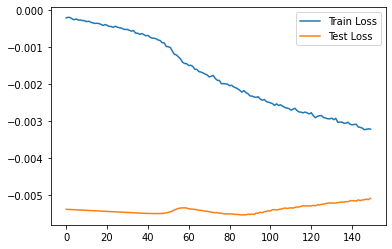

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 15ms/step


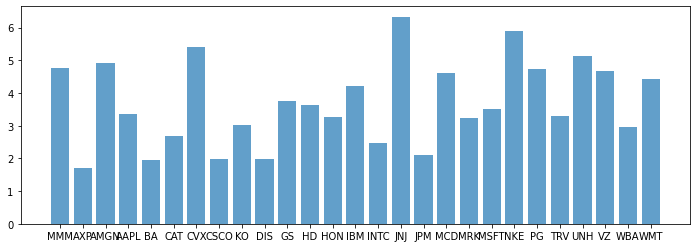

In [22]:
def chech_w(n=0):
    plt.figure(figsize=(12,4))
    y_pred = model.predict(xc_test[n].reshape(1, N_time, N_stock))[0]
    plt.bar(column, y_pred*100, alpha=.7)
    plt.show()
chech_w(0)

xc_test[0]으로 추정한 xf_test[0]의 최적 투자비율(W)